In [1]:
# 集成是合并多个机器学习模型来构建更强大模型的方法
# 两种集成模型对大量分类和回归的数据集都是有效的：随机森林和梯度提升决策树

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

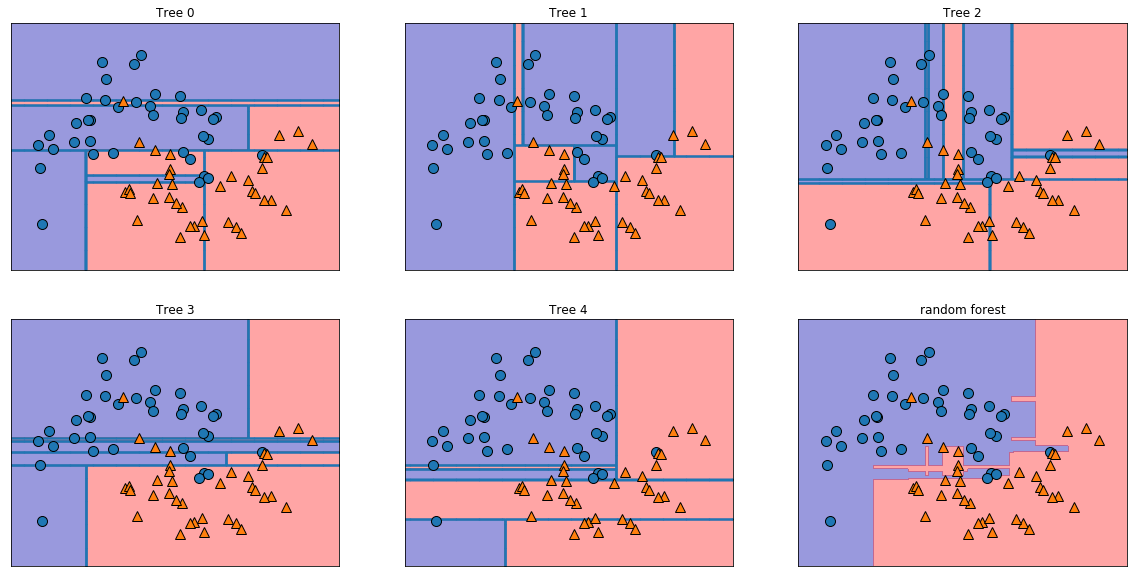

In [3]:
import matplotlib.pyplot as plt
import mglearn
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True,ax=axes[-1, -1], alpha=0.4)
axes[-1, -1].set_title("random forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [4]:
#  自助采样，导致一些数据点没有包含在树的训练集中

# 随机森林本质上是许多决策树的集合，每棵树和其他树都是不同的
# 可以对树的结果取平均值来降低过拟合，既能减少过拟合又能保持树的预测能力
# 随机森林是将随机性添加到树的构造过程中
# 第一是选择用于构造树的数据点，构造每颗决策树的数据集略有不同
# 第二个是通过选择每次划分测试的特征，每个节点的特征选择，每棵树中每次划分都是基于特征的不同子集

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42, stratify=cancer.target)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [6]:
forest.score(X_train, y_train), forest.score(X_test, y_test)

(1.0, 0.958041958041958)

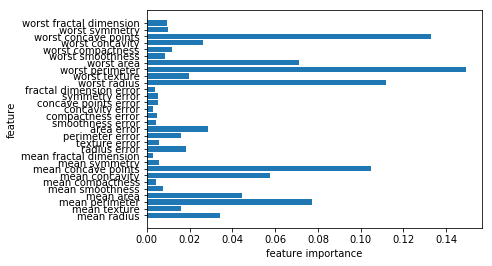

In [9]:
# 随机森林可以给出所有树的特征重要性
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    # arange返回等差数组
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")

plot_feature_importances_cancer(forest)

In [10]:
# max_features决定每棵树的随机性大小，较小的max_features可以降低过拟合

## 梯度提升决策树

通过合并多个决策树来构建一个更为强大的模型，梯度提升采用连续的方式构造树，每棵树都试图纠正前一棵树的错误，
梯度提升回归树没有随机化，而是用到了强预剪枝，梯度提升树通常使用的深度比较小(1-5)，这样占用内存更少，速度更快
梯度提升的思想是合并许多简单的模型，每棵树只能对部分数据做出好的预测，添加的树越来越多，会提高性能
梯度提升的另一个重要参数是learning_rate学习率，用于控制每棵树纠正前一棵树的错误的强度，较高的学习率意味着每棵树都可以做出较强的修正

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42, stratify=cancer.target)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(1.0, 0.958041958041958)

In [17]:
gbrt

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [14]:
# 训练集分数过高，可能出现过拟合
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9882629107981221, 0.958041958041958)

In [18]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.01, n_estimators=1000)
gbrt.fit(X_train, y_train)

gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9882629107981221, 0.958041958041958)

In [ ]:
# 随机森林中增大n_estimators值越大越好，但是梯度提升中，增大n_estimators可能导致模型复杂，进而导致过拟合
# 通常做法是根据时间和内存选择合适的n_estimators，然后对不同的learning_rate进行遍历